This notebook is mainly for using different models to predict the selected variable. The models in this notebook are no where near production ready but does give me a starting point for future modeling.

## _Imports:_

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pycaret.regression import*

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [ ]:
arena = pd.read_csv('../data/arena').drop(columns = "Unnamed: 0")
aci = pd.read_csv('../data/aci').drop(columns = 'Unnamed: 0')

## _WHOOP:_

In [ ]:
arena.head()

auth_user_id  team_id  recovery_score  hrv_rmssd  resting_heart_rate  \
0          1055       95              22  14.740724                  75   
1          1055       95              50  40.321194                 120   
2          1056       95              52  28.036976                  64   
3          1056       95              32  21.550380                  67   
4          1056       95              96  54.167790                  55   

   sleep_performance_score  in_sleep_efficiency  rem_sleep_percent  \
0                       84             0.836381              7.508   
1                      100             0.980510              0.000   
2                       72             0.911056             32.362   
3                       70             0.898349             16.380   
4                       85             0.957279             19.788   

   slow_wave_sleep_percent  total_time_in_bed_(hrs)  ...  total_time_asleep  \
0                   16.179                 7.586118  ...           6.344888   
1                    0.000                13.113445  ...          12.857864   
2                   22.161                 6.841341  ...           6.232846   
3                   21.343                 6.464548  ...           5.807417   
4                   13.592                 8.026697  ...           7.500001   

   total_restorative_sleep  timeframe  date_actual  dow hrv_%_change  \
0                 1.796866          0   2023-04-19  Wed    -0.634417   
1                 0.000000   Baseline   2023-04-18  Tue     0.464576   
2                 3.730083        +30   2023-06-15  Thu    -0.209415   
3                 2.438592        +30   2023-06-14  Wed    -0.392324   
4                 2.679240        +30   2023-06-13  Tue     0.527420   

  rhr_%_change tib_%_change  tta%_change  trs%_change  
0    -0.375000    -0.421501    -0.506536          NaN  
1     0.230769     0.267026     0.339169    -1.000000  
2     0.053498    -0.074058    -0.095165     0.183736  
3     0.102881    -0.125055    -0.156925    -0.226116  
4    -0.094650     0.086375     0.088791    -0.149747  

[5 rows x 23 columns]

In [ ]:
arena.dtypes

auth_user_id                        int64
team_id                             int64
recovery_score                      int64
hrv_rmssd                         float64
resting_heart_rate                  int64
sleep_performance_score             int64
in_sleep_efficiency               float64
rem_sleep_percent                 float64
slow_wave_sleep_percent           float64
total_time_in_bed_(hrs)           float64
rem_sleep_duration_(hrs)          float64
slow_wave_sleep_duration_(hrs)    float64
light_sleep_duration_(hrs)        float64
total_time_asleep                 float64
total_restorative_sleep           float64
timeframe                          object
date_actual                        object
dow                                object
hrv_%_change                      float64
rhr_%_change                      float64
tib_%_change                      float64
tta%_change                       float64
trs%_change                       float64
dtype: object

In [ ]:
arena.isnull().sum()

auth_user_id                         0
team_id                              0
recovery_score                       0
hrv_rmssd                            0
resting_heart_rate                   0
sleep_performance_score              0
in_sleep_efficiency                  0
rem_sleep_percent                    0
slow_wave_sleep_percent              0
total_time_in_bed_(hrs)              0
rem_sleep_duration_(hrs)             0
slow_wave_sleep_duration_(hrs)       0
light_sleep_duration_(hrs)           0
total_time_asleep                    0
total_restorative_sleep              0
timeframe                         1532
date_actual                          0
dow                                  0
hrv_%_change                       239
rhr_%_change                       239
tib_%_change                       239
tta%_change                        239
trs%_change                        241
dtype: int64

Next I will drop columns that I deem unnecessary for modeling and convert 'dow' to 0/1's. To note the last four columns will be dropped since they have the most nulls and they are highly correlated to the other variables in the set. *Sidenote - for the last four variables, I am sure I can code a way to get the percent change if we have the start numbers and current numbers.

In [ ]:
arena = arena.drop(columns = ['auth_user_id','team_id','timeframe','date_actual','hrv_%_change','rhr_%_change','tib_%_change',
                             'tta%_change','trs%_change'])

In [ ]:
arena.isnull().sum()

recovery_score                    0
hrv_rmssd                         0
resting_heart_rate                0
sleep_performance_score           0
in_sleep_efficiency               0
rem_sleep_percent                 0
slow_wave_sleep_percent           0
total_time_in_bed_(hrs)           0
rem_sleep_duration_(hrs)          0
slow_wave_sleep_duration_(hrs)    0
light_sleep_duration_(hrs)        0
total_time_asleep                 0
total_restorative_sleep           0
dow                               0
dtype: int64

In [ ]:
a_model = pd.get_dummies(arena, columns = ['dow'], drop_first=True)

In [ ]:
a_model.head()

recovery_score  hrv_rmssd  resting_heart_rate  sleep_performance_score  \
0              22  14.740724                  75                       84   
1              50  40.321194                 120                      100   
2              52  28.036976                  64                       72   
3              32  21.550380                  67                       70   
4              96  54.167790                  55                       85   

   in_sleep_efficiency  rem_sleep_percent  slow_wave_sleep_percent  \
0             0.836381              7.508                   16.179   
1             0.980510              0.000                    0.000   
2             0.911056             32.362                   22.161   
3             0.898349             16.380                   21.343   
4             0.957279             19.788                   13.592   

   total_time_in_bed_(hrs)  rem_sleep_duration_(hrs)  \
0                 7.586118                  0.569546   
1                13.113445                  0.000000   
2                 6.841341                  2.213987   
3                 6.464548                  1.058864   
4                 8.026697                  1.588289   

   slow_wave_sleep_duration_(hrs)  light_sleep_duration_(hrs)  \
0                        1.227321                    4.548022   
1                        0.000000                   12.857864   
2                        1.516096                    2.502764   
3                        1.379728                    3.368825   
4                        1.090951                    4.820761   

   total_time_asleep  total_restorative_sleep  dow_Mon  dow_Sat  dow_Sun  \
0           6.344888                 1.796866        0        0        0   
1          12.857864                 0.000000        0        0        0   
2           6.232846                 3.730083        0        0        0   
3           5.807417                 2.438592        0        0        0   
4           7.500001                 2.679240        0        0        0   

   dow_Thu  dow_Tue  dow_Wed  
0        0        0        1  
1        0        1        0  
2        1        0        0  
3        0        0        1  
4        0        1        0

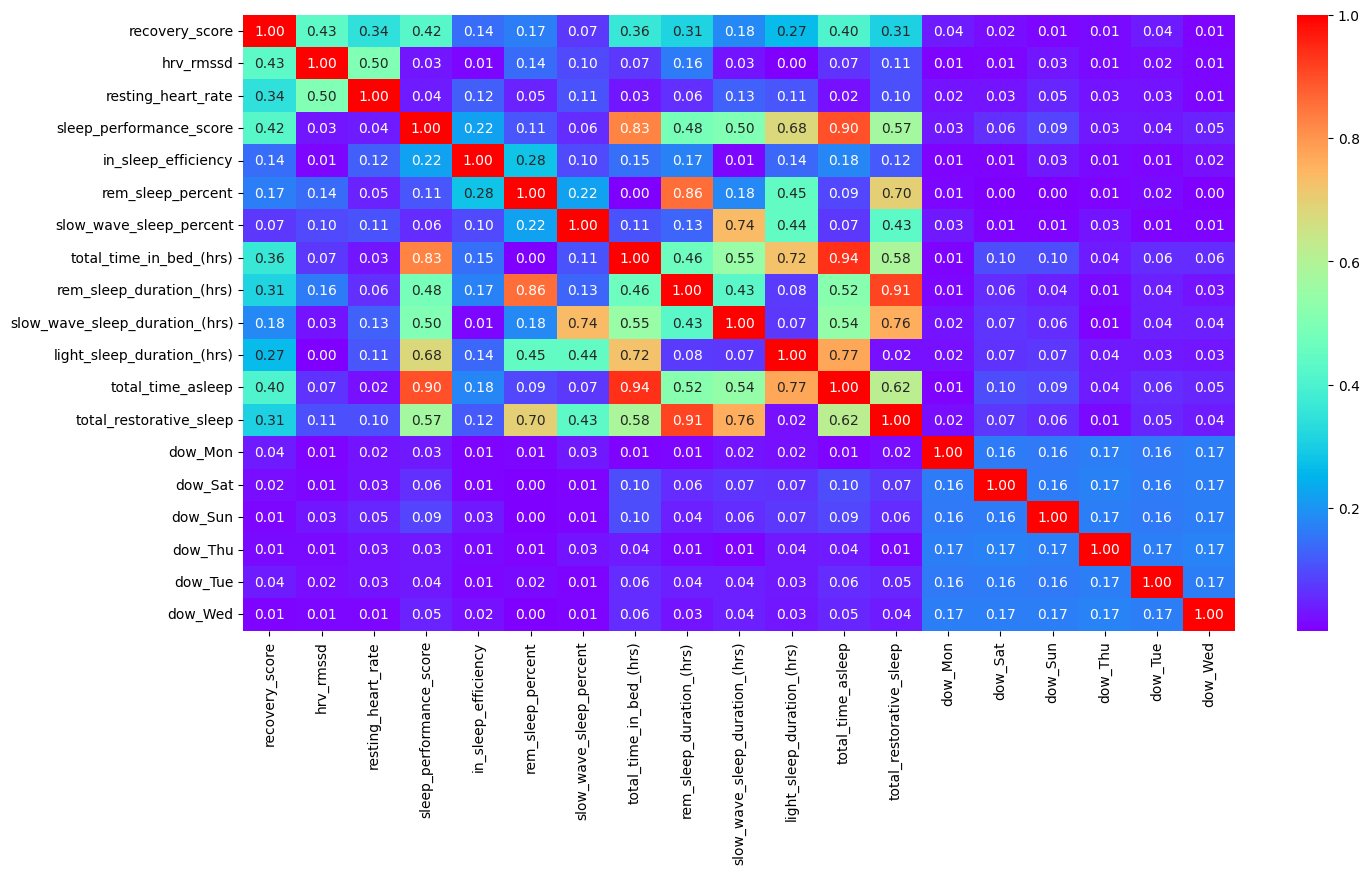

In [ ]:
plt.figure(figsize=(16,8))
sns.heatmap(np.abs(a_model.corr()),annot=True,cmap='rainbow', fmt="0.2f")
plt.show()

Suprisingly, the days of the week seem to not have any correlation with the rest of the variables. I thought I would at least dee a decrease in performance on Mondays.. Will drop the dummy variables and model using pycaret. Target variable will be sleep performance score.

In [ ]:
model = a_model.loc[:, ~a_model.columns.str.contains('dow')]

In [ ]:
model.head()

recovery_score  hrv_rmssd  resting_heart_rate  sleep_performance_score  \
0              22  14.740724                  75                       84   
1              50  40.321194                 120                      100   
2              52  28.036976                  64                       72   
3              32  21.550380                  67                       70   
4              96  54.167790                  55                       85   

   in_sleep_efficiency  rem_sleep_percent  slow_wave_sleep_percent  \
0             0.836381              7.508                   16.179   
1             0.980510              0.000                    0.000   
2             0.911056             32.362                   22.161   
3             0.898349             16.380                   21.343   
4             0.957279             19.788                   13.592   

   total_time_in_bed_(hrs)  rem_sleep_duration_(hrs)  \
0                 7.586118                  0.569546   
1                13.113445                  0.000000   
2                 6.841341                  2.213987   
3                 6.464548                  1.058864   
4                 8.026697                  1.588289   

   slow_wave_sleep_duration_(hrs)  light_sleep_duration_(hrs)  \
0                        1.227321                    4.548022   
1                        0.000000                   12.857864   
2                        1.516096                    2.502764   
3                        1.379728                    3.368825   
4                        1.090951                    4.820761   

   total_time_asleep  total_restorative_sleep  
0           6.344888                 1.796866  
1          12.857864                 0.000000  
2           6.232846                 3.730083  
3           5.807417                 2.438592  
4           7.500001                 2.679240

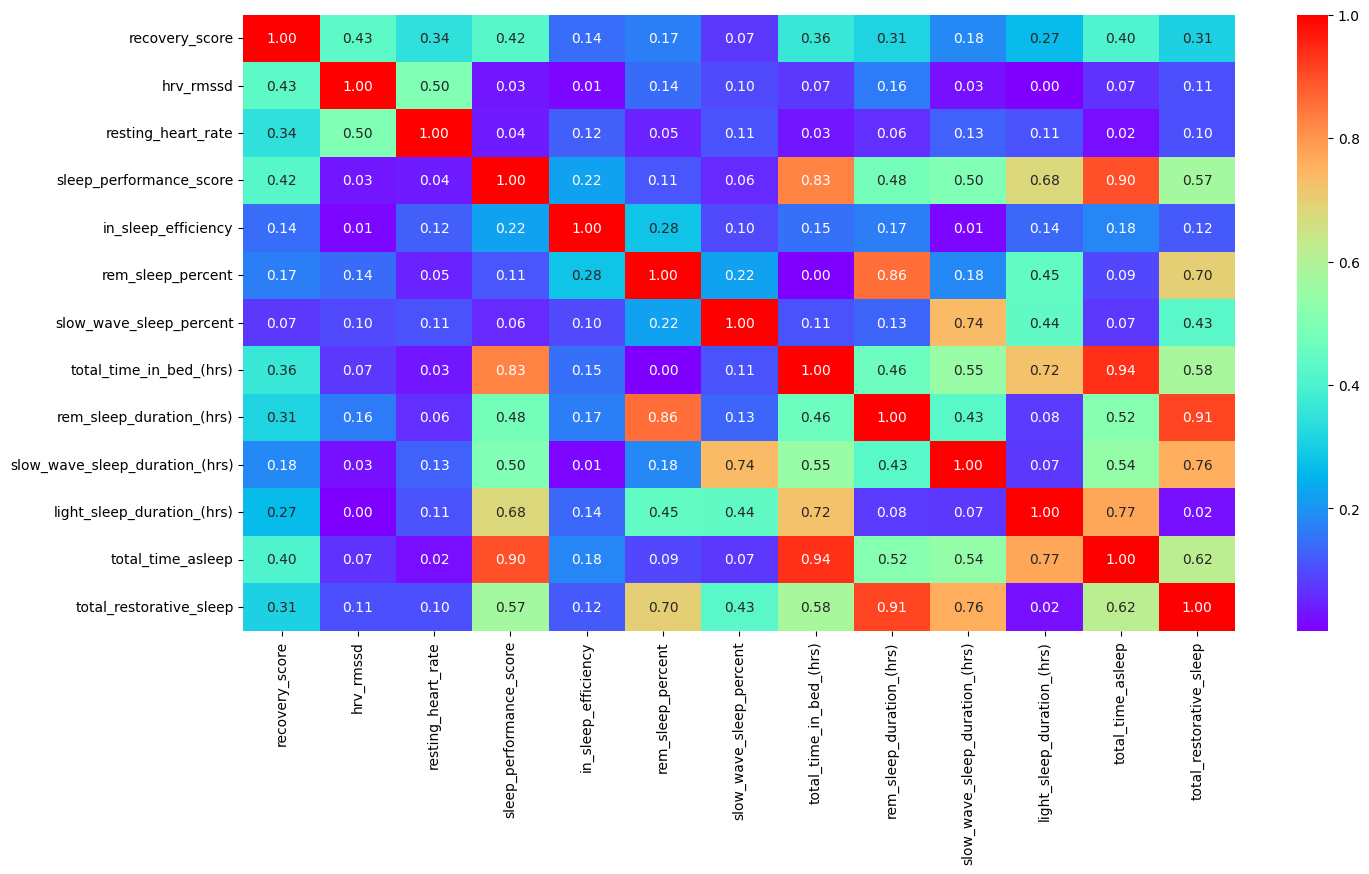

In [ ]:
plt.figure(figsize=(16,8))
sns.heatmap(np.abs(model.corr()),annot=True,cmap='rainbow', fmt="0.2f")
plt.show()

In [ ]:
#Modeling with pycaret
a = setup(model, target = 'sleep_performance_score', session_id = 13)

In [ ]:
best = compare_models()

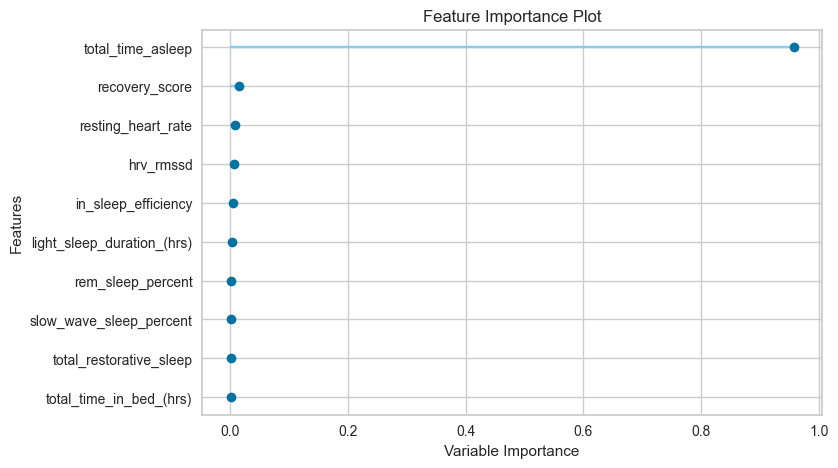

In [ ]:
plot_model(best, plot = 'feature')

Model Discussion:

Gradient Boost model was the best with an RMSE of 6.2. The most important feature was time asleep which makes sense if the performance score weighs heavily on how long you actually sleep. Seems redundant but was good practice for future endeavors and gives me more understanding about the data collected.

## _ACI:_

In [ ]:
aci.head()

auth_user_id   id  team_id                   created_at arena_location  \
0            42   42      NaN  2022-03-03T21:42:22.846158Z   in_the_thick   
1           314  314      NaN  2022-04-07T02:30:40.588856Z     ramping_up   
2           331  331      NaN  2022-04-06T14:17:20.230974Z     ramping_up   
3           814  806     97.0  2023-06-19T05:34:14.448635Z     recharging   
4           814  806     97.0  2023-06-19T05:34:08.325486Z     recharging   

   current_stress  current_energy  current_focus  challenge_anticipated  \
0              15              67             75                    NaN   
1              37              48             26                   38.0   
2              37              37             41                   30.0   
3               9              93             98                    NaN   
4               9              93             98                    NaN   

   preparedness  make_key_decisions  clinical_performance  
0           NaN                 NaN                   NaN  
1          47.0                 NaN                   NaN  
2          50.0                 NaN                   NaN  
3           NaN                 NaN                   NaN  
4           NaN                 NaN                   NaN

In [ ]:
#refresher on nulls
aci.isnull().sum()

auth_user_id                0
id                          0
team_id                     3
created_at                  0
arena_location              0
current_stress              0
current_energy              0
current_focus               0
challenge_anticipated    3081
preparedness             3081
make_key_decisions       3375
clinical_performance     3375
dtype: int64

For the sake of time and seeing how there are many missing values for the last 4 columns, I will drop them for modeling purposes. Moving forward I would like to figure out why these are not being reported. Whether internal or user based. I will also drop the other columns not needed for modeling. Finally I will convert the arena location column to using get dummies so I can add to model.

In [ ]:
aci = aci.drop(columns = ['auth_user_id', 'team_id', 'id', 'challenge_anticipated','preparedness','make_key_decisions',
                         'clinical_performance','created_at'])

In [ ]:
aci.head()

arena_location  current_stress  current_energy  current_focus
0   in_the_thick              15              67             75
1     ramping_up              37              48             26
2     ramping_up              37              37             41
3     recharging               9              93             98
4     recharging               9              93             98

In [ ]:
ac_model = pd.get_dummies(aci, columns= ['arena_location'], drop_first= True)

In [ ]:
ac_model.head()

current_stress  current_energy  current_focus  arena_location_ramping_up  \
0              15              67             75                          0   
1              37              48             26                          1   
2              37              37             41                          1   
3               9              93             98                          0   
4               9              93             98                          0   

   arena_location_recharging  arena_location_winding_down  
0                          0                            0  
1                          0                            0  
2                          0                            0  
3                          1                            0  
4                          1                            0

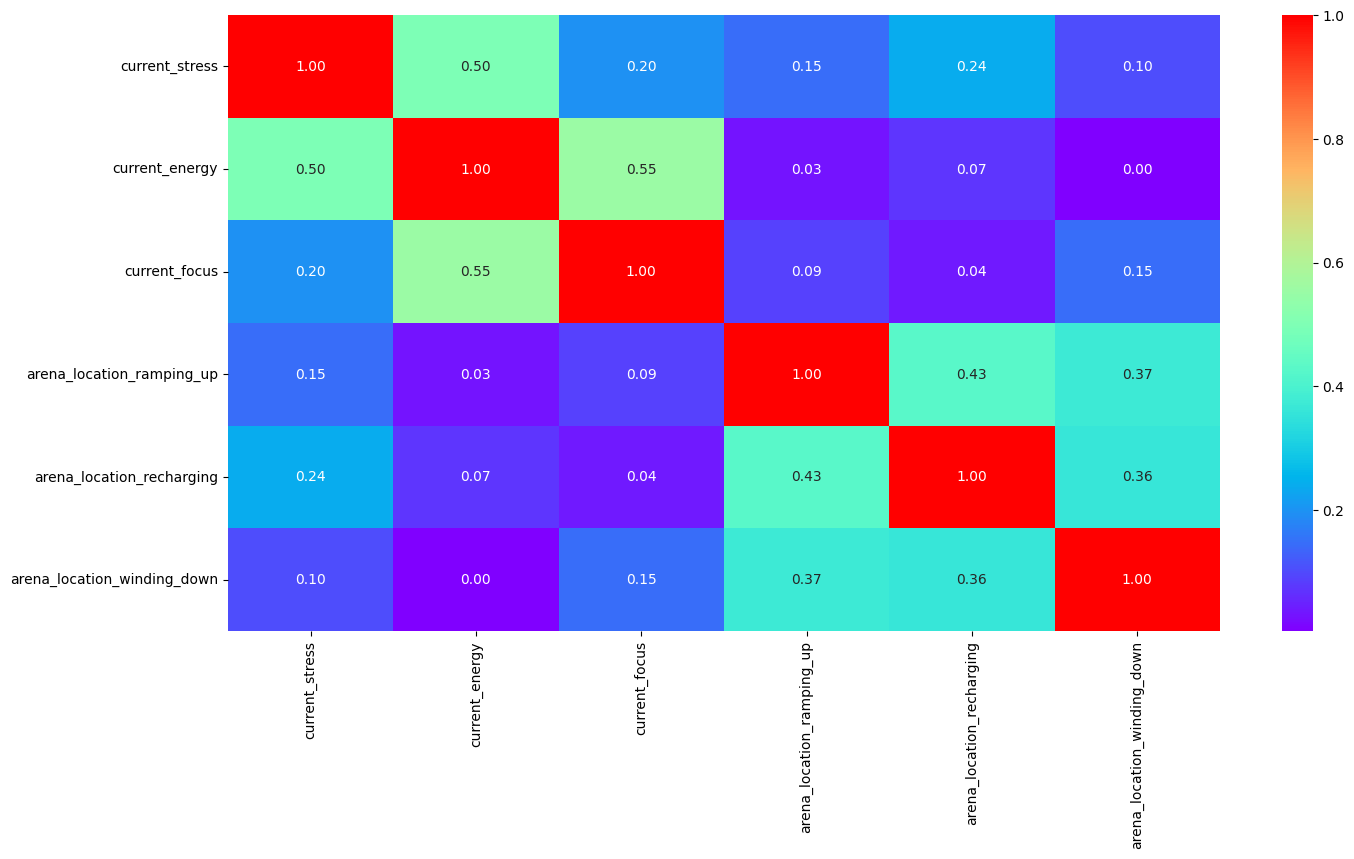

In [ ]:
plt.figure(figsize=(16,8))
sns.heatmap(np.abs(ac_model.corr()),annot=True,cmap='rainbow', fmt="0.2f")
plt.show()

Doesn't seem like there are any major correlations between variables except for current energy/current focus and current energy/current stress. This could also be due to lack of information. With more data, I assume these numbers would change. There is no need to attempt to make a model at this time. Still was good practice though and gives me some insight in to the different relationships between variables.